## Visualização dos dados

Nesse notebook são feitas as visualizações dos dados

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from utils.load_csv import load_csv
from utils.save_graph import save_graph

In [2]:
df_ppa_fonte = load_csv("ppa_fonte.csv")

#### Gráfico 1

In [3]:
df_ppa_fonte_grafico1 = df_ppa_fonte.rename(columns=lambda x: x.strip().replace("'", "").replace(" ", ""))

cols_grafico1 = ["descricaodafuncao", "2022", "2023", "2024", "2025"]

df_ppa_fonte_grafico1 = df_ppa_fonte_grafico1[cols_grafico1]

df_ppa_fonte_grafico1 = df_ppa_fonte_grafico1.groupby("descricaodafuncao").sum()

df_ppa_fonte_grafico1 = df_ppa_fonte_grafico1.T

In [4]:
df_ppa_fonte_grafico1_novo = df_ppa_fonte_grafico1.copy()

df_ppa_fonte_grafico1_novo["Urbanismo e Habitação"] = (df_ppa_fonte_grafico1_novo["Urbanismo"] + df_ppa_fonte_grafico1_novo["Habitação"])

df_ppa_fonte_grafico1_novo["Saneamento e Gestão Ambiental"] = (df_ppa_fonte_grafico1_novo["Saneamento"] + df_ppa_fonte_grafico1_novo["Gestão Ambiental"])

df_ppa_fonte_grafico1_novo = df_ppa_fonte_grafico1_novo.drop(columns=["Urbanismo", "Habitação", "Saneamento", "Gestão Ambiental"])

colunas_ordenadas = ["Saúde",
                     "Educação",
                     "Assistência Social",
                     "Urbanismo e Habitação",
                     "Saneamento e Gestão Ambiental"]

col_outros = [col for col in df_ppa_fonte_grafico1_novo.columns if col not in colunas_ordenadas]

df_ppa_fonte_grafico1_novo["Outros"] = df_ppa_fonte_grafico1_novo[col_outros].sum(axis=1)

df_ppa_fonte_grafico1_novo = df_ppa_fonte_grafico1_novo[colunas_ordenadas + ["Outros"]]

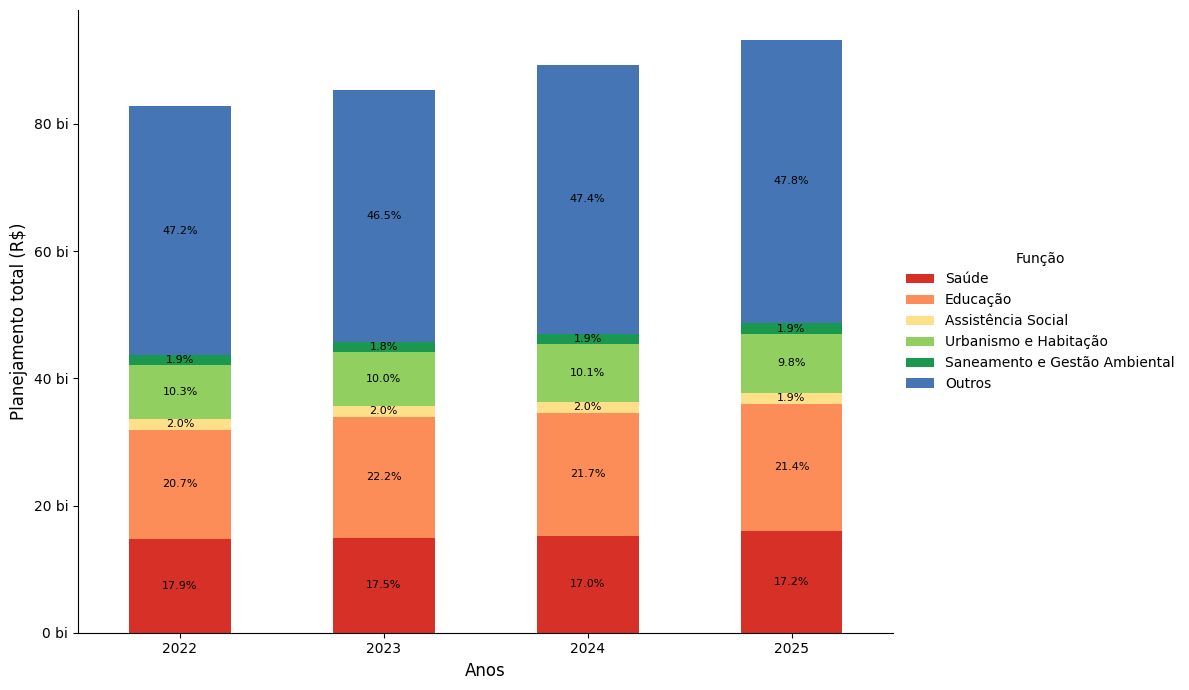

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calcula o DataFrame de percentuais
df_valores = df_ppa_fonte_grafico1_novo.copy()
df_percentual = df_valores.div(df_valores.sum(axis=1), axis=0) * 100

# Cores definidas
cores = ["#d73027", "#fc8d59", "#fee08b", "#91cf60", "#1a9850", "#4575b4"]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
df_valores.plot(kind='bar', stacked=True, ax=ax, color=cores)

# Adiciona rótulos de percentual em cada segmento (mostrando todos)
for i, coluna in enumerate(df_valores.columns):
    acumulado = df_valores.iloc[:, :i].sum(axis=1)
    for j, (valor, perc) in enumerate(zip(df_valores[coluna], df_percentual[coluna])):
        if valor > 0:  # Mantém apenas para evitar divisão por zero
            ax.text(j,
                    acumulado.iloc[j] + valor / 2,
                    f'{perc:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='black',)

# Estilo e legendas
#ax.set_title("Planejamento de recursos por função (2022 - 2025)", fontsize=16)
ax.set_ylabel("Planejamento total (R$)", fontsize=12)
ax.set_xlabel("Anos", fontsize=12)
ax.set_xticks(range(len(df_valores.index)))
ax.set_xticklabels(df_valores.index, rotation=0)
ax.legend(title="Função", bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Eixo Y em bilhões
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1e9:.0f} bi')
ax.yaxis.set_major_formatter(formatter)

# Fonte
#plt.figtext(0.01, 0.01, "Fonte: Prefeitura Municipal de São Paulo (2025)", ha="left", fontsize=10)

plt.tight_layout()
plt.show()
